# Projet Numérique : Dynamique Quantique

## Résolution en états stationnaire 

Numba : a voir vers la fin
http://www.enit.rnu.tn/fr/Minds/quant/amphi6MQ.pdf pour explication sin et cos

In [96]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
L = 5

dx = L/N

print("dx : ", dx)

## On initialise x tel que 

x = np.linspace(-L,L,N)

print("x : \n",x)

dx :  0.05
x : 
 [-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.080808

V :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


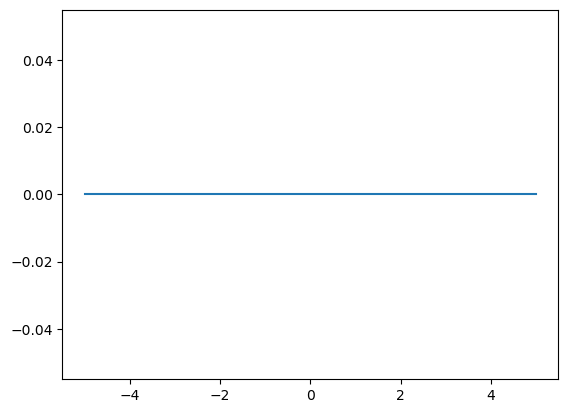

In [97]:
## On commence par former la liste de valeurs des vecteurs et V.

V = np.zeros(N)

''' Pour un potentiel fini :
for i in range(x.size):
    if (x[i]<= -L/2) or (x[i]>=L/2):
        V[i] = 10

'''

print("V : ", V)

plt.plot(x,V)
plt.show()

In [98]:
## Ensuite, on forme les matrices d et e diagonales principale et supérieure (resp) de H

d = np.zeros(N)
e= np.zeros(N-1)

for i in range(V.size):
    d[i] = 2/(dx**2) + V[i]

for i in range(e.size):
    e[i] = -1/(dx**2)

print("d : \n", d)
print("e : \n", e)

d : 
 [800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800.]
e : 
 [-400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400.
 -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400.
 -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400.
 -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400.
 -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400.
 -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400. -400.
 -400. -400. -400. -400. -400. -400. -400

In [99]:
from scipy.linalg import eigh_tridiagonal

## Puis, on calcule w et v respectivement les valeurs propres et vecteurs propres de H

w, v = eigh_tridiagonal(d,e)

print("w : \n", w)
print("v : \n", v)

w : 
 [3.86974166e-01 1.54752229e+00 3.48052162e+00 6.18410211e+00
 9.65564821e+00 1.38918014e+01 1.88884635e+01 2.46408006e+01
 3.11432477e+01 3.83895140e+01 4.63725892e+01 5.50847503e+01
 6.45175688e+01 7.46619191e+01 8.55079871e+01 9.70452799e+01
 1.09262636e+02 1.22148236e+02 1.35689614e+02 1.49873669e+02
 1.64686679e+02 1.80114314e+02 1.96141649e+02 2.12753177e+02
 2.29932829e+02 2.47663984e+02 2.65929488e+02 2.84711671e+02
 3.03992362e+02 3.23752909e+02 3.43974193e+02 3.64636654e+02
 3.85720300e+02 4.07204735e+02 4.29069174e+02 4.51292465e+02
 4.73853108e+02 4.96729277e+02 5.19898841e+02 5.43339384e+02
 5.67028230e+02 5.90942461e+02 6.15058942e+02 6.39354342e+02
 6.63805155e+02 6.88387729e+02 7.13078280e+02 7.37852922e+02
 7.62687688e+02 7.87558550e+02 8.12441450e+02 8.37312312e+02
 8.62147078e+02 8.86921720e+02 9.11612271e+02 9.36194845e+02
 9.60645658e+02 9.84941058e+02 1.00905754e+03 1.03297177e+03
 1.05666062e+03 1.08010116e+03 1.10327072e+03 1.12614689e+03
 1.14870753e+03 1.

In [100]:
# On doit désormais normaliser les vecteurs propres :

def normalize(m, dx):
    m /= np.linalg.norm(m,axis=0)
    m /= np.sqrt(dx)
    return m

for vec in v:
    normalize(v,dx)

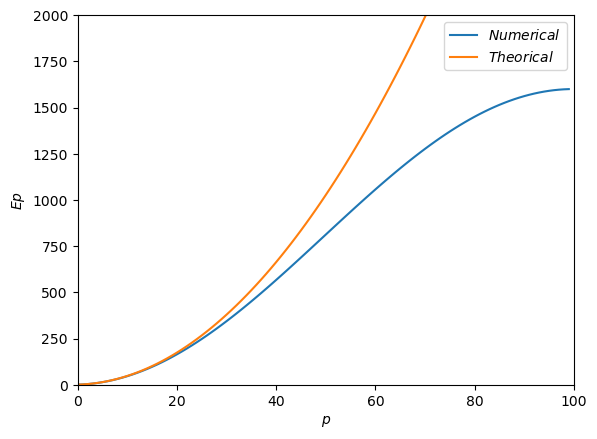

In [146]:
## On regarde la différence entre la courbe théorique et la courbe obtenu

p = np.arange(0,N,1)

Ep = np.zeros(N)
for i in range(N):
    Ep[i] = (np.pi*(i+1)/L)**2

plt.plot(p,w,label="$Numerical$")
plt.plot(p,Ep,label = "$Theorical$")
plt.xlabel('$p$')
plt.ylabel('$Ep$')
plt.xlim(0, 100)
plt.ylim(0, 2000)
plt.legend()
plt.show()

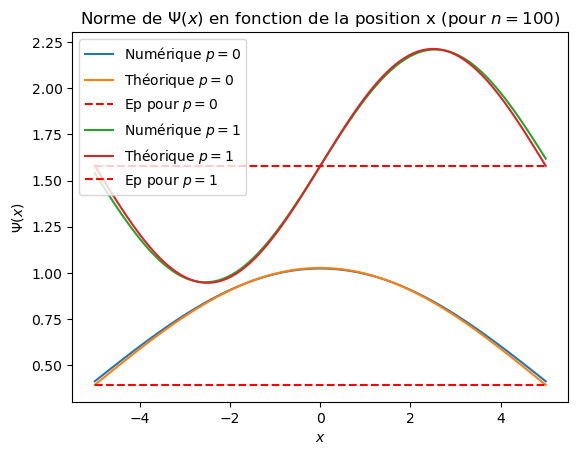

In [161]:
# On compare le théorique et le calculé pour psi

def psi_theo(p):
    psi_theo = np.zeros(N)
    for i in range(N):
        if (p%2 == 0): #fonction pair
            psi_theo[i] = np.sqrt(2/L)*np.cos(((p+1)*np.pi*x[i])/(L*2))
        else: #fonction impair
            psi_theo[i] = np.sqrt(2/L)*np.sin(((p+1)*np.pi*x[i])/(L*2))
    return psi_theo

def psi_num(p):
    psi_num = np.zeros(N)
    for i in range(N):
        psi_num[i] = v[i][p]
    return psi_num

def energie_pot(p):
    value_ep = np.zeros(N)
    for i in range(value_ep.size):
        value_ep[i] = Ep[p]
    return value_ep

''' pour créer tout les documents indépendants
for i in range(2):
    p=i
    plt.plot(x,psi_num(p),label="Numérique")
    plt.plot(x,psi_theo(p),label = "Théorique")
    plt.xlabel('$x$')
    plt.ylabel('$\Psi(x)$')
    plt.title('Norme de $\Psi(x)$ en fonction de la position x (pour $p=%.i$ et $n=%.i$)' %(p,N))
    plt.legend()
    plt.savefig('document/psi_fonction_de_x_potentiel_nul.pdf',format='pdf')
    plt.savefig('document/psi_fonction_de_x_potentiel_nul')
    plt.show()
'''

plt.plot(x,psi_num(0)+Ep[0],label="Numérique $p=0$")
plt.plot(x,psi_theo(0)+Ep[0],label = "Théorique $p=0$")
plt.plot(x,energie_pot(0),"r--",label = "Ep pour $p=0$")
plt.plot(x,psi_num(1)+Ep[1],label="Numérique $p=1$")
plt.plot(x,psi_theo(1)+Ep[1],label = "Théorique $p=1$")
plt.plot(x,energie_pot(1),"r--",label = "Ep pour $p=1$")
plt.xlabel('$x$')
plt.ylabel('$\Psi(x)$')
plt.title('Norme de $\Psi(x)$ en fonction de la position x (pour $n=%.i$)' %N)
plt.legend()
plt.savefig('document/psi_fonction_de_x_potentiel_nul.pdf',format='pdf')
plt.savefig('document/psi_fonction_de_x_potentiel_nul')
plt.show()